# EDSA Movie Recommendation 2022: Unsupervised Learning 
Done by 
     Jeniffer Mukami.


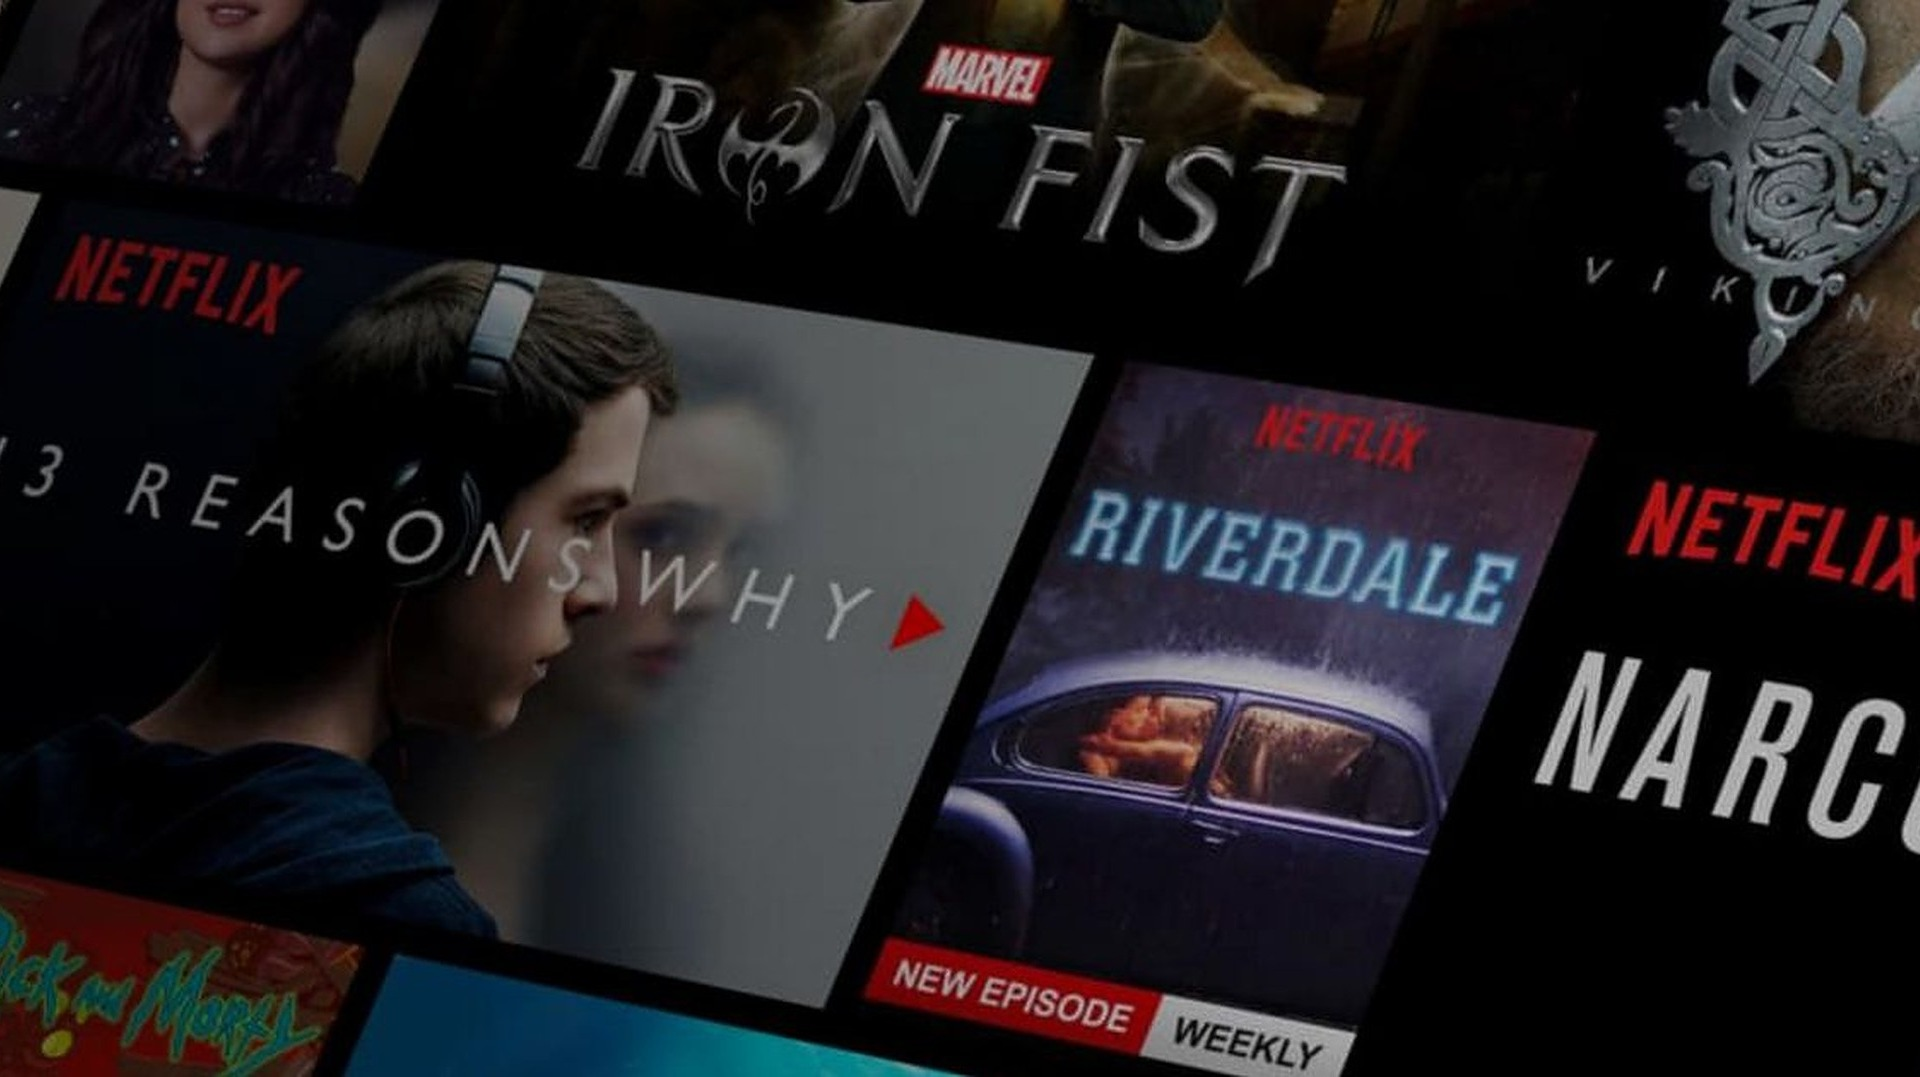

<a id="cont"></a>

## Table of Contents
<a href=#one>1. Introduction</a>

- <a href=#two>1.1 Overview</a>

- <a href=#two>1.2 Problem Statement</a>


<a href=#two>2. Comet Experiment</a>

<a href=#three>3. Loading Dependencies</a>

- <a href=#two>3.1 Import the libraries</a>

- <a href=#four>3.2 loading the data</a>

- <a href=#four>3.3 Data description and Summary Statistics </a>

<a href=#four>4. Exploratory Data Analysis</a>

- <a href=#four>4.1 Ratings and Users</a>

- <a href=#four>4.2 Runtime</a>

- <a href=#four>4.3 Genres </a>

- <a href=#four>4.4 Release year </a>

- <a href=#four>4.5 Directors</a>

- <a href=#four>4.6 Actors</a>

- <a href=#four>4.7 Plot Keywords</a>

<a href=#five>5. Modeling</a>

- <a href=#five>5.1 Content Based Filtering</a>

- <a href=#five>5.2 Collaborative-Based Filtering </a>

<a href=#six>6. Performance Evaluation</a>

<a href=#seven>7. Data Engineering</a>

<a href=#eight>8. Best Model Explanation</a>

- <a href=#eight>8.1 Kaggle submission</a>

- <a href=#eight>8.2 Pickle File Generation</a>

- <a href=#eight>8.3 Comet experiment end</a></a>

<a href=#nine>9. Conclusion</a>

<a id="one"></a>
## 1. Introduction
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

### Overview

In today’s technology-driven world, recommender systems are socially and economically critical to ensure that individuals can make optimised choices surrounding the content they engage with daily. One application where this is especially true is movie recommendations; where intelligent algorithms can help viewers find great movie options from tens of thousands of choices.

Recommender systems are beneficial to both service providers and users. They reduce transaction costs of finding and selecting items in an online shopping environment. Recommendation systems have also proved to be beneficial to the decision making process and quality.

### Problem Statement

Online consumers of contents like movies, books and songs frequently face the struggle of having to choose between a myriad of options when searching for these products. A need arises for a service that will narrow down the options and provide recommendations that best suit the consumers. For the consumers, this will save them time and easen the choice process. For the service providers, this means an increase in sales or engagement. Our project seeks to provide the solution for the movie consumers and service providers.  

<a id="two"></a>
## 2. Comet Experiment
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [ ]:
#!!pip install comet_ml

In [1]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="CL3r4k2Kr1MFTRdavZUxjrBSy",
    project_name="team-15-recommender-system",
    workspace="jeniffermukami",
)


COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/jeniffermukami/team-15-recommender-system/73e0417b3753499d95d20107c890e3b9



<a id="three"></a>
## 3. Loading Dependencies
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

### Import the libraries

In [ ]:
#!!pip install surprise

In [2]:
# Install packages here

# Package we need fore Comet
from comet_ml import Experiment

# Packages for data processing
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
from scipy.sparse import csr_matrix
import scipy as sp

# Package for timing code
import timeit


# Packages for visualization
import matplotlib
import seaborn as sns 
%matplotlib inline
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS 

# Style
import matplotlib.style as style 
sns.set(font_scale=1.5)
style.use('seaborn-pastel')
sns.set(style="whitegrid")
sns.set_style("dark")


# Packages for modeling
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import mean_squared_error, mean_absolute_error
from surprise import Reader
from surprise import Dataset
from surprise import KNNBaseline, KNNBasic, KNNWithMeans, KNNWithZScore
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise import SVD,NormalPredictor
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering,BaselineOnly
from sklearn.neighbors import  NearestNeighbors
import heapq

# Performance Evaluation
from surprise import accuracy
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from surprise.model_selection import GridSearchCV, cross_validate, train_test_split
from time import time

# Package to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Packages for saving models
import pickle

import cufflinks as cf
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Packages for Randomisation
import random
%matplotlib inline

sns.set(style='whitegrid', palette='muted',
        rc={'figure.figsize': (15,10)})

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

### Loading the data

For this Project, we'll be using a special version of the MovieLens dataset which iss enriched with additional data, and resampled for fair evaluation purposes.

__Source__

The data for the MovieLens dataset is maintained by the [GroupLens](https://grouplens.org/) research group in the Department of Computer Science and Engineering at the University of Minnesota. Additional movie content data was legally scraped from IMDB and is readily available on [kaggle](https://www.kaggle.com/competitions/edsa-movie-recommendation-2022/data) .


In [7]:
#Kaggle setup
! pip install -q kaggle

from google.colab import  files
files.upload()

#Create Kaggle Folder
!mkdir ~/.kaggle
#Copy Kaggle.json file to new folder
! cp kaggle.json ~/.kaggle/
#Grant Permissions
! chmod 600  ~/.kaggle/kaggle.json
#Datasets List
! kaggle datasets list

Saving kaggle.json to kaggle.json
ref                                                                            title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
datasets/muratkokludataset/acoustic-extinguisher-fire-dataset                  Acoustic Extinguisher Fire Dataset               621KB  2022-04-02 22:59:36            304        338  0.9375           
datasets/piterfm/2022-ukraine-russian-war                                      2022 Ukraine Russia War                            2KB  2022-04-24 10:24:15          11172        618  1.0              
datasets/muhmores/spotify-top-100-songs-of-20152019                            Spotify Top 100 Songs of 2010-2019               139KB  2022-04-09 06:35:36           1

In [8]:
! kaggle competitions download -c edsa-movie-recommendation-2022

 98% 235M/239M [00:07<00:00, 45.2MB/s]
100% 239M/239M [00:07<00:00, 31.7MB/s]


In [9]:
#Unzip datasets
! mkdir datasets
!unzip  edsa-movie-recommendation-2022.zip 

Archive:  edsa-movie-recommendation-2022.zip
  inflating: genome_scores.csv       
  inflating: genome_tags.csv         
  inflating: imdb_data.csv           
  inflating: links.csv               
  inflating: movies.csv              
  inflating: sample_submission.csv   
  inflating: tags.csv                
  inflating: test.csv                
  inflating: train.csv               


In [10]:
# import dataset
movies_df = pd.read_csv('movies.csv') 
imdb_df = pd.read_csv('imdb_data.csv')
genome_score = pd.read_csv('genome_scores.csv')
genome_tags = pd.read_csv('genome_tags.csv')
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
tags_df = pd.read_csv('tags.csv')
links_df = pd.read_csv('links.csv')
sample_submission_df = pd.read_csv('sample_submission.csv') 

Above we have the following datasets
* genome_scores.csv - a score mapping the strength between movies and tag-related properties.
* genome_tags.csv - user assigned tags for genome-related scores.
* imdb_data.csv - Additional movie metadata scraped from IMDB using the links.csv file.
* links.csv - File providing a mapping between a MovieLens ID and associated IMDB and TMDB IDs.
* sample_submission.csv - Sample of the submission format for the hackathon.
* tags.csv - User assigned for the movies within the dataset.
* test.csv - The test split of the dataset. Contains user and movie IDs with no rating data.
* train.csv - The training split of the dataset. Contains user and movie IDs with associated rating data.


### Data Description & Summary Statistics

__train and test data info and shape__

In [ ]:
display(train_df.head(3))

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539


In [ ]:
display(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


None

In [ ]:
print(train_df.isnull().sum())

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


We can see that the train df has over 10 million entries with only 4 features.Now let us do further analysis of the training set.

In [ ]:
print("Total Train Data:")
print("Total number of movie ratings in Train data = "+str(train_df.shape[0]))
print("Number of unique users in Train data = "+str(len(np.unique(train_df["userId"]))))
print("Number of unique movies in Train data = "+str(len(np.unique(train_df["movieId"]))))
print("Highest value of a User ID = "+str(max(train_df["userId"].values)))
print("Highest value of a Movie ID = "+str(max(train_df["movieId"].values)))

Total Train Data:
Total number of movie ratings in Train data = 10000038
Number of unique users in Train data = 162541
Number of unique movies in Train data = 48213
Highest value of a User ID = 162541
Highest value of a Movie ID = 209171


In [ ]:
# View test data info, shape and content  
display(test_df.head(3))
display(test_df.info()) 
print(test_df.isnull().sum()) 

,userId,movieId
0,1,2011
1,1,4144
2,1,5767


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000019 entries, 0 to 5000018
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   userId   int64
 1   movieId  int64
dtypes: int64(2)
memory usage: 76.3 MB


None

userId     0
movieId    0
dtype: int64


__movies data__

In [ ]:
# View movies data info and shape and content head 
display(movies_df.head())
movies_df.info() 
print(movies_df.isnull().sum()) 

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB
movieId    0
title      0
genres     0
dtype: int64


__Genome Scores and tags__

The tag genome encodes how strongly movies exhibit particular properties represented by tags (atmospheric, thought-provoking, realistic, etc.). The tag genome was computed using a machine learning algorithm on user-contributed content including tags, ratings, and textual reviews.
The file genome-scores.csv contains movie-tag relevance data in the following format:

movieId,tagId,relevance
The second file, genome-tags.csv, provides the tag descriptions for the tag IDs in the genome file, in the following format:

tagId,tag

In [ ]:
genome_tags.info() 
genome_score.info() 
display(genome_tags.head()) 
print(genome_tags.isnull().sum())
print(genome_tags.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584448 entries, 0 to 15584447
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 356.7 MB


,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


tagId    0
tag      0
dtype: int64
tagId    0
tag      0
dtype: int64


__Imdb database of movies__

In [ ]:
display(imdb_df.head()) 
display(imdb_df.info()) 
print(imdb_df.isnull().sum())

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


None

movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64


There are 62423 movies in the movies database and only 27278 in the imdb dataset.
The IMBD dataset gives more infomation to about 27000+ movies present in the train dataset. The features are title_cast, director, runtime, budget as well plot_keywords. The title_cast feature describes the most famous/paid actors/actresses in the movie and runtime describes how long movie was and plot_keyword describes the most important key words of the plot

There are alot of missing values in this  data frame,to invesitage further we will look into the dataframes column by column to a clear description of the dataset by looking at the count, perecntage of missing values aswell as the datatype for each column.

In [ ]:
print(f'The imdb dataset has {imdb_df.shape[0]} rows/entries and {len(imdb_df.columns)} columns')
percentange=imdb_df.isnull().mean().round(4) * 100
count = imdb_df.isnull().sum()
count_percentage = pd.DataFrame({'Count':count,'Percentage': percentange,'data_type':imdb_df.dtypes},
                                index=imdb_df.columns)
count_percentage

The imdb dataset has 27278 rows/entries and 6 columns


,Count,Percentage,data_type
movieId,0,0.00,int64
title_cast,10068,36.91,object
director,9874,36.20,object
runtime,12089,44.32,float64
budget,19372,71.02,object
plot_keywords,11078,40.61,object


It appears that most of the columns in the Dataset has over 25 % of missing values, meaning that our dataset has caputured only 75% or less information from the real world data. Missing Values is a common occurance when dealing with real world data. There are various ways to handle missing values the most effective technique being imputing missing values with either a 0 or using aggregate methods such as mean and median.

##### count of unique entries of features of interest in the database

In [ ]:
# Count the number of unique entries for features of interest
unique_movies = len(movies_df['movieId'].unique().tolist())
unique_tags = len(tags_df['tag'].unique().tolist())
unique_users = len(train_df['userId'].unique().tolist())
unique_directors = len(imdb_df['director'].unique().tolist())
unique_actors = len(imdb_df['title_cast'].unique().tolist())

# Create a dataframe to store the number of unique entries for features of interest
unique = pd.DataFrame({"movies": [unique_movies],
                       "tags" : [unique_tags],
                       "users": [unique_users],
                       "directors" : [unique_directors],
                       "actors" : [unique_actors]}, index=['unique_entries'])

print('number of unique entries for features of interest')
display(unique.transpose())

# Determine and display the min and max ratings received
min_rating = train_df.rating.min()
max_rating = train_df.rating.max()
print('Lowest rating: {}'.format(min_rating))
print('Highest rating: {}'.format(max_rating))

number of unique entries for features of interest


,unique_entries
movies,62423
tags,73051
users,162541
directors,11787
actors,17144


Lowest rating: 0.5
Highest rating: 5.0


<a id="four"></a>
## 3. Exploratory Data Analysis
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


We have been provided with a lot of datasets to help us model at a good recommender system. We will perform an EDA to get as much information about the movies and users as we can from the database,to make data driven decisions.

Here we will go ahead and do an extensive analysis on:
* Ratings and users
* Runtime
* Genres
* Release year
* Directors
* Actors
* Plot keywords


### Ratings and users

Using the train dataset, we can get an overview of how each user was rated for each movie. It was observed that each user can rate a movie from 0.5 (Worst) to 5.0 (Best). Here is the full detailed scale:
 * 0.5 - Very Bad
 * 1.0 - Bad
 * 1.5 - Moderately Bad
 * 2.0 - Not that Bad
 * 2.5 - Less than average 
 * 3.0 - Average 
 * 3.5 - Above than average 
 * 4.0 - Good
 * 4.5 - Very Good
 * 5.0 - Excellent 
 <br>

__which users have rated the most movies ?__

In [ ]:
def user_ratings_count(df, n):
    """
    Counts the number of user ratings.
    Parameters
    
    """
    plt.figure(figsize=(8,6))
    data = df['userId'].value_counts().head(n)
    ax = sns.barplot(x = data.index, y = data, order= data.index, palette='brg', edgecolor="black")
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=11, ha='center', va='bottom')
    plt.title(f'Top {n} Users by Number of Ratings', fontsize=14)
    plt.xlabel('User ID')
    plt.ylabel('Number of Ratings')
    print("Combined number of ratings:\t",df['userId'].value_counts().head(n).sum(),
         "\nTotal number of movies:\t\t", df['movieId'].nunique())
    plt.show()

Combined number of ratings:	 34398 
Total number of movies:		 48213


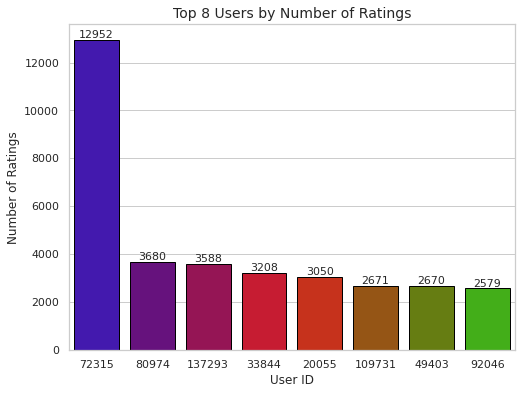

In [ ]:
user_ratings_count(train_df,8)

The user 72315 has rated a lot of movies compared to the other users,we will remove this user for EDA purposes.

In [ ]:
eda_df = train_df[train_df['userId']!=72315]

Combined number of ratings:	 23734 
Total number of movies:		 45844


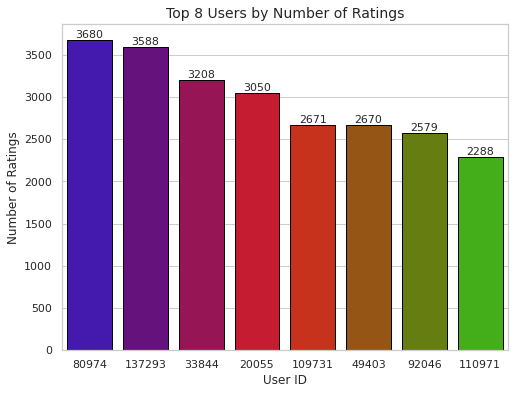

In [ ]:
user_ratings_count(eda_df,8)

Let us look at the number of ratings the we have lost because of removing the outlier.

In [ ]:
print("No of ratings lost:\t",34398-23734)
print("Movies rated by user 72315:\t",48213-45844)

No of ratings lost:	 10664
Movies rated by user 72315:	 2369


__What is the distribution of ratings from worst to best__

In [ ]:
def ratings_distplot(df, column='rating'):
    """
    Plots the distribution of ratings in the dataset.
    """
    plt.figure(figsize=(8,6))
    ax = sns.distplot(df[f'{column}'],bins=10, kde=False, hist_kws=dict(alpha=0.6),color="#4D17A0")
    mean = df[f'{column}'].mean()
    median = df[f'{column}'].median()
    plt.axvline(x=mean, label = f'mean {round(mean,2)}' , color='#4D17A0', lw=3, ls = '--')
    plt.axvline(x=median, label = f'median {median}' , color='#4DA017', lw=3, ls = '--')
    plt.xlim((0.5,5))
    plt.ylim((0,2500000))
    plt.title(f'Distribution of Ratings', fontsize=14)
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

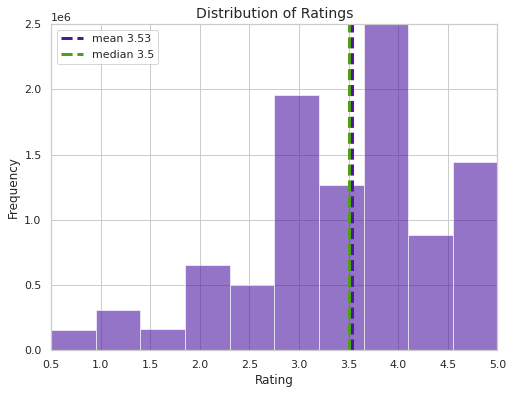

In [ ]:
ratings_distplot(eda_df)

Here the we can see that the ratings have a left skewed distribution,This implies that most users tend to only give psitive reviews.

__Lets look at the percentage of movies rated in each categor__



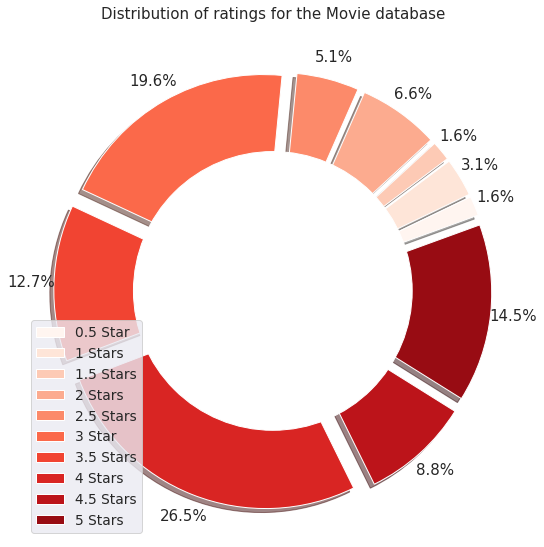

In [ ]:
# Merge train with movies to join movie titles and ratings 
ratings = train_df.merge(movies_df, on='movieId', how='inner')

# Count how many ratings are in each category OO
grouped = pd.DataFrame(ratings.groupby(['rating'])['title'].count())
grouped.rename(columns={'title':'rating_count'}, inplace=True)

# Creating plots 
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(122)
    
# Create colour palette
labels = ['0.5 Star', '1 Stars', '1.5 Stars', '2 Stars', '2.5 Stars', '3 Star', '3.5 Stars', '4 Stars', '4.5 Stars', '5 Stars']
theme = plt.get_cmap('Reds')
ax.set_prop_cycle("color", [theme(1. * i / len(labels))
                                 for i in range(len(labels))])
sns.set(font_scale=1.25)

# Create pie chart
pie = ax.pie(grouped['rating_count'],
                 autopct='%1.1f%%',
                 shadow=True,
                 startangle=20,
                 pctdistance=1.115,
                 explode=(0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1))
   
# Turn pie chart into a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Display donut plot with legend
plt.legend(pie[0], labels, loc="lower left")
ax.set_title('Distribution of ratings for the Movie database\n', fontsize=15)
plt.tight_layout()
plt.show()

This chart can be explains that people only tend to rate the movies that they like. In other words, if a user doesn't like a movie, it is unlikely that they will watch it through to the end,and therefore they will not rate it.

### Runtime

From its humble beginnings of 1 minute silent, black & white clips to epic 3 hour visual delights, movies have a come a long way in terms of runtime. In this section, let us try to gain some additional insights about the nature of movie lengths and their evolution over time.



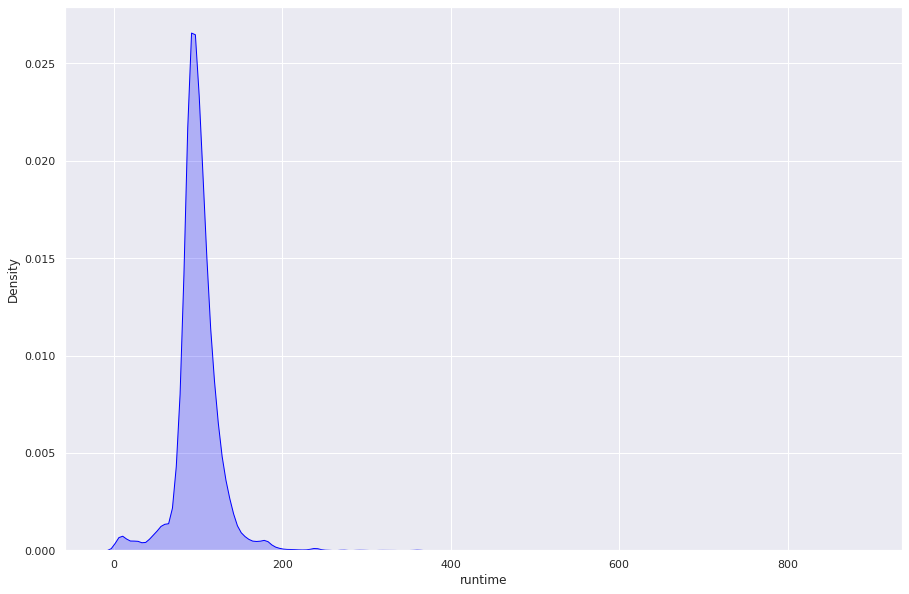

In [ ]:
#Plot the Runtime
sns.set(style="darkgrid", )
sns.kdeplot(data=imdb_df['runtime'], shade=True, color='blue')

let us do a descriptive analysis to make more sense of our graph above.

In [ ]:
# Describe the runtime 
imdb_df['runtime'].describe()

count    15189.000000
mean       100.312331
std         31.061707
min          1.000000
25%         89.000000
50%         98.000000
75%        109.000000
max        877.000000
Name: runtime, dtype: float64

Here it can be seen that the average length of a movie is 1hr 40 minutes ,with the longest one having 877minutes. There is also have a film film as short as 1 minute. 

### Genres

__The most common Genres observed__

In [ ]:
def feature_frequency(df, column):
    """
    Function to count the number of occurences of metadata such as genre
    Parameters
    
    -------
        
    """
    # Creat a dict to store values
    df = df.dropna(axis=0)
    genre_dict = {f'{column}': list(),
                 'count': list(),}
    # Retrieve a list of all possible genres
    print('retrieving features...')
    for movie in range(len(df)):
        gens = df[f'{column}'].iloc[movie].split('|')
        for gen in gens:
            if gen not in genre_dict[f'{column}']:
                genre_dict[f'{column}'].append(gen)
    # count the number of occurences of each genre
    print('counting...')
    for genre in genre_dict[f'{column}']:
        count = 0
        for movie in range(len(df)):
            gens = df[f'{column}'].iloc[movie].split('|')
            if genre in gens:
                count += 1
        genre_dict['count'].append(count)
        
        # Calculate metrics
    data = pd.DataFrame(genre_dict)
    print('done!')
    return data
genres = feature_frequency(movies_df, 'genres')

retrieving features...
counting...
done!


In [ ]:
def feature_count(df, column):
    plt.figure(figsize=(10,6))
    ax = sns.barplot(y = df[f'{column}'], x = df['count'], palette='brg', orient='h')
    plt.title(f'Number of Movies Per {column}', fontsize=14)
    plt.ylabel(f'{column}')
    plt.xlabel('Count')
    plt.show()

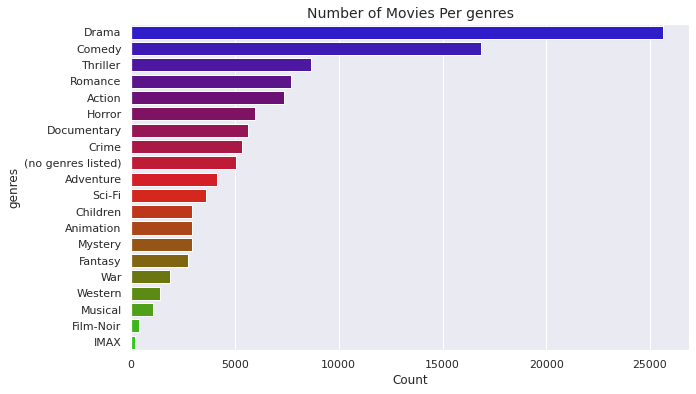

In [ ]:
feature_count(genres.sort_values(by = 'count', ascending=False), 'genres')

Here we can see about 5000 movies have no genres listed.Drama can also be seen as the most frequent genre in the database. Comedy comes in at a distant second with 25% of the movies having adequate doses of humor. Other major genres in the top 10 are Thriller, Romance,Action, Horror, Documentary and Crime.
IMAX is not a genre but rather a proprietary system for mass-viewings.

We can use the IMDB and TMDB ID's together with the APIs to fill missing data. 

__The above figure does tell us the most frequent genres in the database but nothung about the popularity of the genres, lets look at the most popular movies in a particular time based on their ratings__

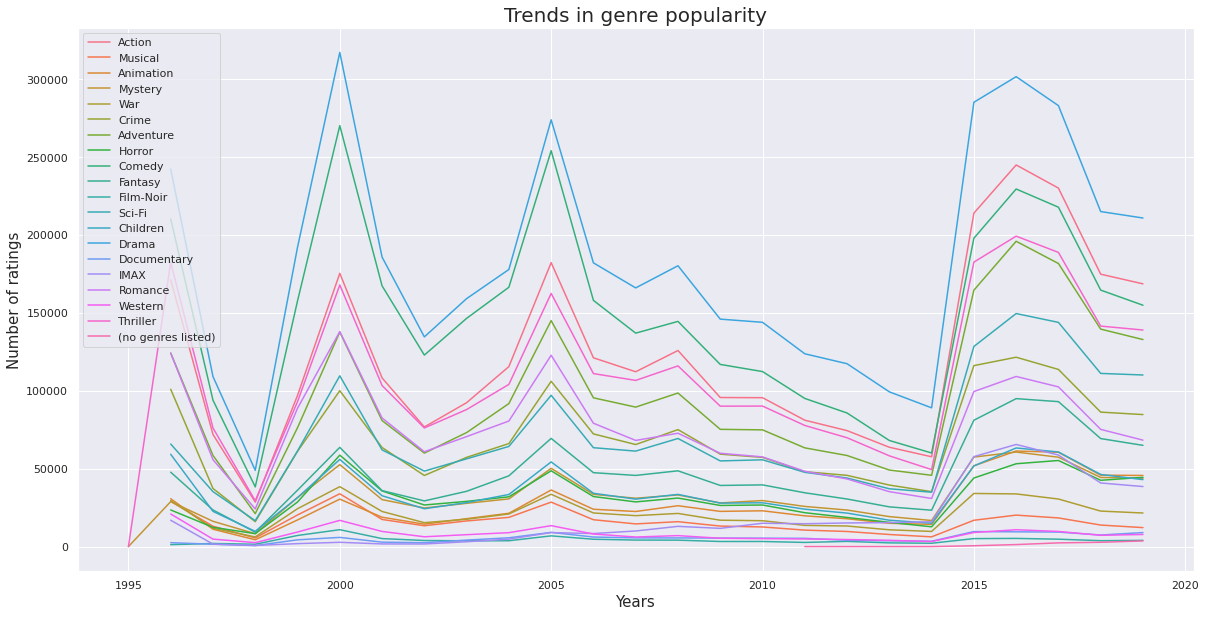

In [ ]:
def most_watched(input_df):  
    """"
    This function creates a plot showing the popularity of each genre 
    over the last 50 years.
    
    """   
    # Create a copy of the input dataframe and merge it to the movies dataframe
    df = input_df.copy()
    df = df.merge(movies_df,on='movieId',how='left')
    
    # Create an empty dataframe
    b = pd.DataFrame()
    
    # Extract the timestamps and genres 
    timestamps = [timestamp for timestamp in df.timestamp]
    all_genres = set(','.join([genres.replace('|',',') for genres in df.genres]).split(','))
    
    # Get the number of ratings for each genre for each year since 1970
    for index,genre in enumerate(all_genres):
        a = pd.Series([int((timestamps[i]/31536000)+1970) for i,x in enumerate(df.genres) if genre in x])
        a = a.value_counts()
        b = pd.concat([b,pd.DataFrame({genre:a})],axis=1)
    
    # Plot the trends for each genre on the same line graph 
    plt.figure(figsize=(20,10))
    plot = sns.lineplot(data=b, dashes=False)
      
    # Add plot labels
    plt.title('Trends in genre popularity',fontsize=20)
    plt.xlabel('Years', fontsize=15)
    plt.ylabel('Number of ratings', fontsize=15)
    
    plt.show()
    
    return

most_watched(train_df)

According to this graph we have the most popular genres are  Drama and comedy,with drama being the most popular at all times since 1995.

### Release Year

The dataset has 48213 movies available to us. It is reasonable to assume that it does include almost every major film released during those years. With these assumptions in mind, let us take a look at the number of movies produced by the year.

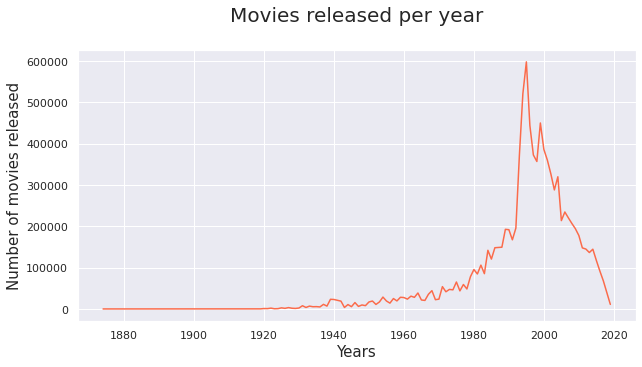

In [ ]:
# Extract the release year fron the movie titles
ratings['release_year'] = ratings.title.map(lambda x: re.findall('\d\d\d\d', x))
ratings.release_year = ratings.release_year.apply(lambda x: np.nan if not x else int(x[-1]))
years =  pd.DataFrame(ratings.groupby(['release_year'])['title'].count())
years.rename(columns={'title':'movies released'}, inplace=True)

# Plot the number of movies released per year
plt.figure(figsize=(10,5))
plot = sns.lineplot(data=years, dashes=False, legend=False, palette='Reds_r')

# Add figure labels
plt.xlabel('Years', fontsize=15)
plt.ylabel('Number of movies released', fontsize=15)
plt.title('Movies released per year\n', fontsize=20)

plt.show() 

It is observed that most movies were released as we approached 2000 and reached at their peak during the 1990's,This could be because the increase in technological advancements like the introduction of motion picture projectors and more people having access to the entertainment in theatres.

### Directors

__Who are the most common directors__

We will only take directors who have made 10 or more movies otherwise we will have to analyze 11000 directors

In [ ]:
def count_directors(df, count = 10):
    
    directors = pd.DataFrame(df['director'].value_counts()).reset_index()
    directors.columns = ['director', 'count']
    directors = directors[directors['count']>=count]
    return directors.sort_values('count', ascending = False)
directors = count_directors(imdb_df)

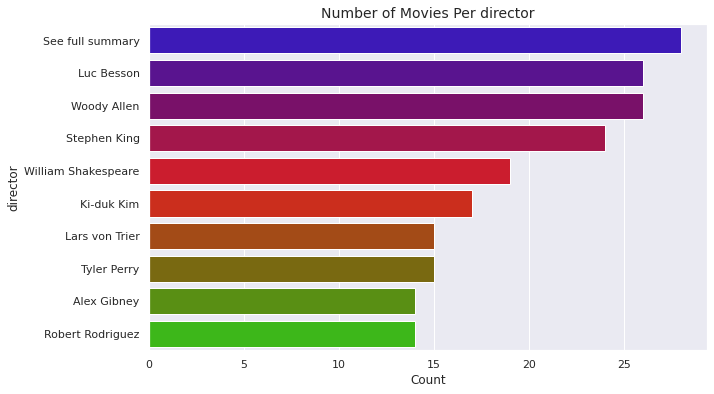

In [ ]:
feature_count(directors.head(10), 'director')

'see full summary' is not a director ,we can use IMDB API to retrieve this data,so Luc Besson and woody Allen can be seen as the most common directors.

##### We could also use a word cloud to show the same while remove the 'see full summary'.

__Let us prepare a data set for word cloud and corpus generation__

In [ ]:
df = imdb_df[['movieId','title_cast','director', 'plot_keywords']]
df = df.merge(movies_df[['movieId', 'genres', 'title']], on='movieId', how='inner')
df['year'] = df['title'].str.extract(r"\((\d+)\)", expand=False)

In [ ]:
# Convert data types to strings for string handling
df['title_cast'] = df.title_cast.astype(str)
df['plot_keywords'] = df.plot_keywords.astype(str)
df['genres'] = df.genres.astype(str)
df['director'] = df.director.astype(str)

# Removing spaces 
df['director'] = df['director'].apply(lambda x: "".join(x.lower() for x in x.split()))
df['title_cast'] = df['title_cast'].apply(lambda x: "".join(x.lower() for x in x.split()))

# Discarding the pipes 
df['title_cast'] = df['title_cast'].map(lambda x: x.split('|')[:3])
df['title_cast'] = df['title_cast'].apply(lambda x: " ".join(x))


# Discarding the pipes between the plot keywords' and getting only the first five words
df['plot_keywords'] = df['plot_keywords'].map(lambda x: x.split('|')[:5])
df['plot_keywords'] = df['plot_keywords'].apply(lambda x: " ".join(x))

# Discarding the pipes between the genres 
df['genres'] = df['genres'].map(lambda x: x.lower().split('|'))
df['genres'] = df['genres'].apply(lambda x: " ".join(x))
df.head()

,movieId,title_cast,director,plot_keywords,genres,title,year
0,1,tomhanks timallen donrickles,johnlasseter,toy rivalry cowboy cgi animation,adventure animation children comedy fantasy,Toy Story (1995),1995
1,2,robinwilliams jonathanhyde kirstendunst,jonathanhensleigh,board game adventurer fight game,adventure children fantasy,Jumanji (1995),1995
2,3,waltermatthau jacklemmon sophialoren,markstevenjohnson,boat lake neighbor rivalry,comedy romance,Grumpier Old Men (1995),1995
3,4,whitneyhouston angelabassett lorettadevine,terrymcmillan,black american husband wife relationship betra...,comedy drama romance,Waiting to Exhale (1995),1995
4,5,stevemartin dianekeaton martinshort,alberthackett,fatherhood doberman dog mansion,comedy,Father of the Bride Part II (1995),1995


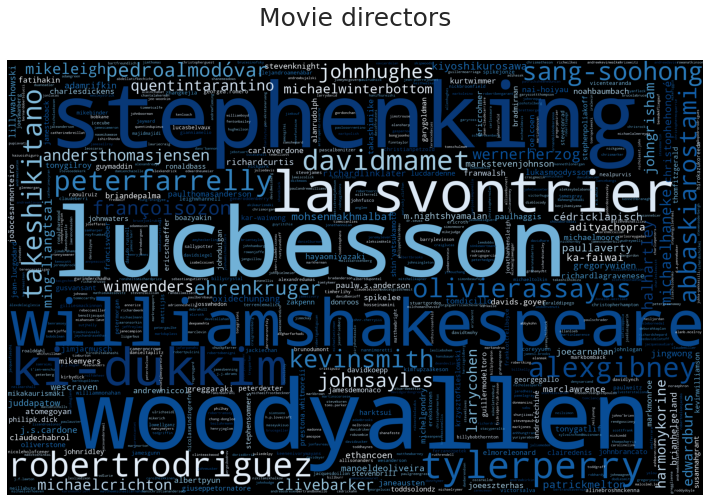

In [ ]:
def wordcloud_generator(df, column):  
    
    keyword_counts = {}
    keyword_pair = []
    words = dict()
    
    # list of words that should be removed 
    removed = ['nan', ' nan', 'nan ', 'seefullsummary', ' seefullsummary', 'seefullsummary ']
    
    # Extract the unique keywords 
    for keyword in [keyword for keyword in df[column] if keyword not in removed]:
        if keyword in keyword_counts.keys():
            keyword_counts[keyword] += 1
        else:
            keyword_counts[keyword] = 1
     # Pair the keywords with their frequencies
    for word,word_freq in keyword_counts.items():
        keyword_pair.append((word,word_freq))
       
    # Sort the keywords accprding to their frequencies
    keyword_pair.sort(key = lambda x: x[1],reverse=True)
    
    # Make it wordcloud-ready
    for s in keyword_pair:
        words[s[0]] = s[1]
        
    # Create a wordcloud using the top 2000 keywords
    wordcloud = WordCloud(width=800, 
                          height=500, 
                          background_color='black', 
                          max_words=2000,
                          max_font_size=110,
                          scale=3,
                          random_state=0,
                          colormap='Blues').generate_from_frequencies(words)

    return wordcloud 

# Generate a WordCloud using the movie directors  
directorc = wordcloud_generator(df, 'director')

# Plot the WordCloud 
f = plt.figure(figsize=(20, 8)) 
plt.imshow(directorc) 
plt.axis('off') 
plt.title('Movie directors\n', fontsize=25)
plt.show()

As seen earlier,Lucbesson,Stephen King,Woodyallen,Ki-dukkim and William Shakepeare are the most popular directors based on the number of films in the database that they have directed.Stephen King and william Shakespear are both writers and not directors but lots of films have been made based on their books.

We could also try and see the the most popular directors based on their ratings. We will do this by calculating the mean rating for each director to determine the most popular.

In [1]:
def count_directors(df, count = 10):
    
    directors = pd.DataFrame(df['director'].value_counts()).reset_index()
    directors.columns = ['director', 'count']
    directors = directors[directors['count']>=count]
    return directors.sort_values('count', ascending = False)
directors = count_directors(imdb_df)

In [ ]:
def dir_mean(df):
    df.set_index('director', inplace=True)

    direct_ratings = []
    #eda_df.merge(imdb_df, on='movieID, how='left')
    #join_df = df_a.merge(df_b, on='mukey', how='left')


    directors_eda = eda_df.merge(imdb_df, on = 'movieId', how = 'left')
    for director in df.index:
        rating = round(directors_eda[directors_eda['director']==director]['rating'].mean(),2)
        direct_ratings.append(rating)
    df['mean_rating'] = direct_ratings
    return df.sort_values('mean_rating', ascending = False)

In [ ]:
directors = dir_mean(directors)

In [ ]:
directors.head()

,count,mean_rating
director,,
Stephen King,24,4.05
Quentin Tarantino,10,3.94
John Sayles,11,3.93
Ki-duk Kim,17,3.89
Pedro Almodóvar,11,3.85


In [ ]:
def feat_popularity(df, title = 'feat'):
    """
    Plots the mean rating per director.
    """
    plt.figure(figsize=(10,6))
    plot_data = df.copy()
    mean = plot_data['mean_rating'].mean()
    min_ = plot_data['mean_rating'].min()
    max_ = round(plot_data['mean_rating'].max(),2)
    sns.barplot(y = plot_data.index, x = plot_data['mean_rating'], order = plot_data.index, orient='h',palette='brg')
    plt.axvline(x=mean, label = f'mean {round(mean,1)}' , color='black', lw=1, ls ='--')
    plt.axvline(x=min_, label = f'min {round(min_,1)}' , color='#4D17A0', lw=1, ls = '--')
    plt.axvline(x=max_, label = f'max {max_}' , color='#4DA017', lw=1,ls = '--')
    plt.title(f'Mean Rating Per {title}', fontsize=14)
    plt.ylabel(f'{title}')
    plt.xlabel('Mean Rating')
    plt.legend(loc='lower center')
    plt.show()

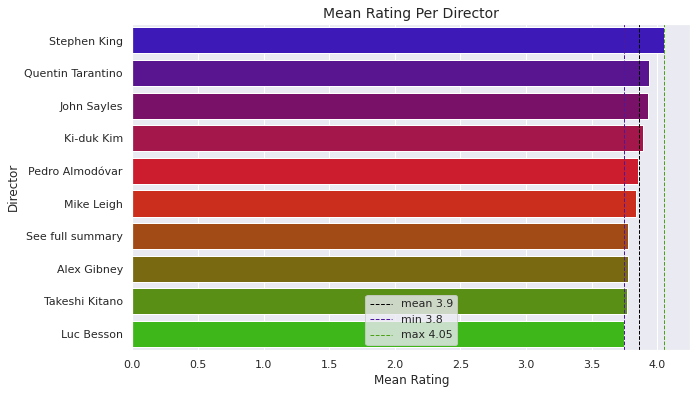

In [ ]:
feat_popularity(directors.head(10), 'Director')

We see some very well known names, Stephen King and Quentin Tarantino are unsurprisingly t the top of the list. It begs the question, who are the worst rated directors?

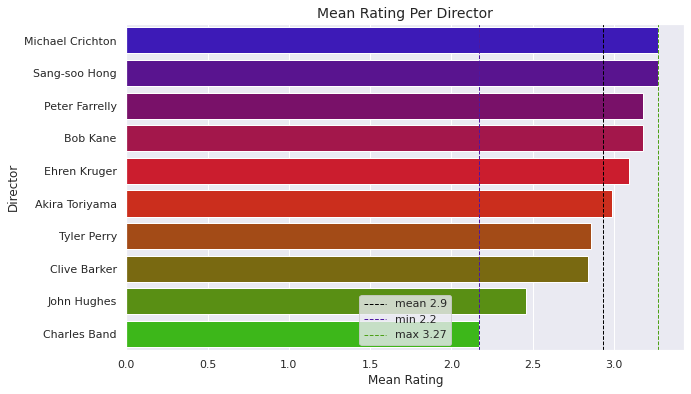

In [ ]:
feat_popularity(directors.tail(10), 'Director')

Amazingly some very well known directors like Tyler Perry,with a mean rating of below 3.0 appears to be in the list of the worst rated directors,regardless of the large number of movies that he has produced.

### Actors

Now let us have a look at some of the actors with the most movies in the database.

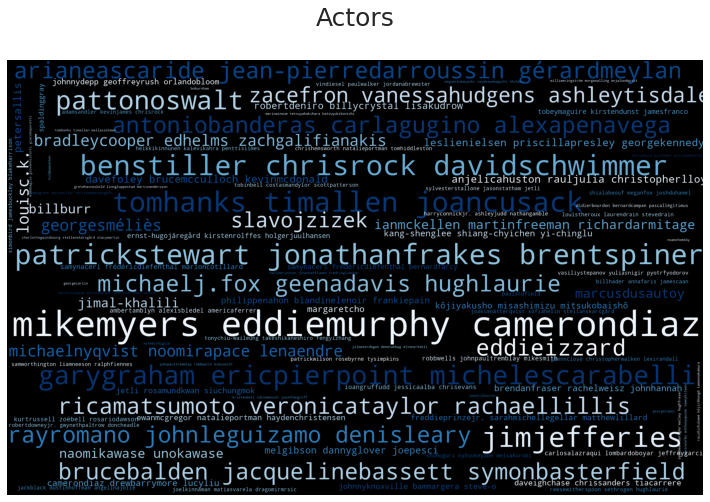

In [ ]:
actors = wordcloud_generator(df, 'title_cast')

# plot the WordCloud                        
f = plt.figure(figsize=(20, 8)) 
plt.imshow(actors) 
plt.axis('off') 
plt.title('Actors\n', fontsize=25)
plt.show()

### Plot keywords

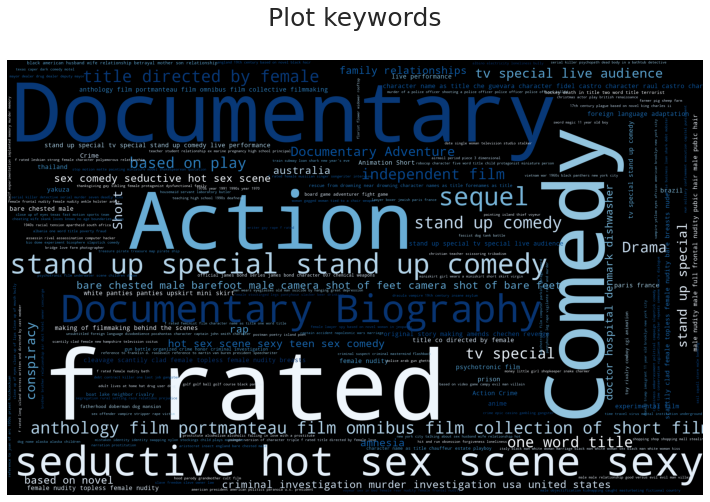

In [ ]:
# Plot wordcloud
plot_keywords = wordcloud_generator(df, 'plot_keywords')
f = plt.figure(figsize=(20, 8)) 
plt.imshow(plot_keywords) 
plt.axis('off') 
plt.title('Plot keywords\n', fontsize=25)
plt.show()

Plot Keywords are words or phrases that describe motifs, themes, character types, or plot details. Each plot keyword is searchable, so if you wanted a list of, say, every movie where a character gets hit with a hammer, you just need to go to the “Hit With A Hammer”.
Some plot keywords are normally oddly specific and others are generic eg.(“Murder,” “Crying”) so they would be very useful in content based filtering.
Above here we can see some of the most common plot keywords in the IMDB database.


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Machine learning algorithms in recommender systems typically fit into two categories: content-based systems and collaborative filtering systems. Modern recommender systems combine both approaches.

#### Content-based filtering

This makes recommendations based on user preferences for product features. It is able to recommend new items, but is limited by the need for more data of user preference to improve the quality of recommendations.

#### Collaborative filtering

Collaborative filtering mimics user-to-user recommendations.

#### Hybrid systems

A combination of these two recommendations systems is called a hybrid system. They mix the features of the item itself and the preferences of other users


### Content-Based Filtering

A content-based recommender system strives to give the best user experience by tailoring the product to the user.This is done by using content based filtering methods. These methods utilise the description of the characteristics of the item such as the genre, category, tags etc.With all that theory in mind, the Content-Based Recommendation system that we built computes similarity between movies based on 'title_cast', 'director', 'plot_keywords'and 'genres'. The model was not used to predict ratings for the testing data, as it is too computationally expensive.

* Item level data source -
You need a strong source of data associated to the attributes of the item. The more information you know regarding the item, the more beneficial it will be for your system.

* User level data source -
You need some sort of user feedback based on the item you’re providing recommendations for. This level of feedback can be either implicit or explicit.  The more user feedback you can track, the more beneficial it will be for your system.

These columns will be combined to form the corpus for each film which will then be used to determine the similarity between films.

In [ ]:
# Creating an empty column and list to store the corpus for each movie
df['corpus'] = ''
corpus = []

# columns of interest
columns = ['title_cast', 'director', 'plot_keywords', 'genres']

# For each movie, combine the contents of the selected columns to form it's unique corpus 
for i in range(0, len(df['movieId'])):
    words = ''
    for col in columns:
        words = words + df.iloc[i][col] + " "        
    corpus.append(words)

# Add the corpus information for each movie to the dataframe 
df['corpus'] = corpus
df.set_index('movieId', inplace=True)

# Drop the columns we don't need 
df.drop(columns=['title_cast', 'director', 'plot_keywords', 'genres'], inplace=True)

df.head()

,title,year,corpus
movieId,,,
1,Toy Story (1995),1995,tomhanks timallen donrickles johnlasseter toy ...
2,Jumanji (1995),1995,robinwilliams jonathanhyde kirstendunst jonath...
3,Grumpier Old Men (1995),1995,waltermatthau jacklemmon sophialoren marksteve...
4,Waiting to Exhale (1995),1995,whitneyhouston angelabassett lorettadevine ter...
5,Father of the Bride Part II (1995),1995,stevemartin dianekeaton martinshort alberthack...


#### Vectorizing the content 

The content-based recommender system that we are developing makes use of the descriptions of the characteristics of the movie.These description are often qualitative.To utilise this vital information we vectorized the qualitative feature.We used the  **Term Frequency (TF)** and **Inverse Document Frequency (IDF)** which is commonly used as an  information retrieval systems and also content based filtering mechanisms (such as a content based recommender). The TF-IDF vectorizer is commonly used to determine the relative importance of a document / article / news item / movie etc.

This informed our decision of using the  TfidfVectorizer function from scikit-learn to transforms text to feature vectors that can be used as input to estimator.


In [ ]:
#create a vectorizer
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
vec = tf.fit_transform(df['corpus'])

#### Finding the Similarities between movies

To find the similarities between two movies we made use of the Cosine Similarity to calculate a numeric quantity that denotes the similarity between the two movies.
Cosine similarity is a metric used to measure how similar the documents are irrespective of their size. Mathematically, it measures the cosine of the angle between two vectors projected in a multi-dimensional space. The cosine similarity is advantageous because even if the two similar documents are far apart by the Euclidean distance (due to the size of the document), chances are they may still be oriented closer together. The smaller the angle, higher the cosine similarity.
We made use of sklearn's linear_kernel to generate the cosine similarities.

In [ ]:
cos_sim = cosine_similarity(vec, vec)
print(cos_sim.shape)
cos_sim[:6]


(24866, 24866)


array([[1.        , 0.02601059, 0.04019328, ..., 0.00592263, 0.        ,
        0.01682672],
       [0.02601059, 1.        , 0.        , ..., 0.02850676, 0.        ,
        0.01630372],
       [0.04019328, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00266976, 0.        , 0.00788265, ..., 0.        , 0.        ,
        0.        ],
       [0.0029888 , 0.        , 0.00322678, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

**Top-N Recommendations**

With our content similarity matrix computed, we're now ready to make some recommendations. We will begin by generating a top-N list of movies similar to one which we prompt the system with.


In [ ]:
def get_topN_recommendations(title, n=10):
    """
    This function gets the top n recomended movies based on the 
    title of the movie input by the user 
    
    """ 
    df1 = df.reset_index()
    
    # Extract the movie titles
    titles = df1['title']
    indices = pd.Series(df1.index, index=df['title'])
    idx = indices[title]
    
    # Get the similarity scores of the top n movies most similar to the user input
    sim_scores = list(enumerate(cos_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:n]
    
    # Exctract the titles of the top n most similar movies  
    movie_indices = [i[0] for i in sim_scores]
    
    return titles.iloc[movie_indices]

get_topN_recommendations('Peter Pan (2003)').head(10)

986                        Escape to Witch Mountain (1975)
1953             Darby O'Gill and the Little People (1959)
2002                                   Return to Oz (1985)
2070                         NeverEnding Story, The (1984)
2307                         Santa Claus: The Movie (1985)
10715    Brothers Lionheart, The (Bröderna Lejonhjärta)...
15233                           Alice in Wonderland (1933)
24008              Journey to the Beginning of Time (1955)
2322                          Young Sherlock Holmes (1985)
Name: title, dtype: object

Since you liked Peter Pan you most probably would also like the above movies which shares the same properties *eg.genre* as peterpan.

However some of the limitations  of the content based filter are :

* It does not recommend items outside a user's content profile
* It is unable to exploit quality judgements of other users
* Consumers might have multiple interests

### Collaborative-Based Filtering

The collaborative filtering approach builds models based on user’s past behaviors as well as similar decisions made by other users. This model is used to predict items (or ratings for items) that the user may have an interest in. Within collaborative filtering, there are two well-known distinct approaches:
​
- Memory-Based: models calculate the similarities between users / items based on user-item rating pairs.
- Model-Based: models use some sort of machine learning algorithm to estimate the ratings

In our modelling we're going to use the surprise package. Surprise is a Python scikit for building and analyzing recommender systems that deal with explicit rating data. The name SurPRISE stands for Simple Python RecommendatIon System Engine.

Surprise allows us to use a built-in datasets, Movielens. We'll use this data to run experiments on with different models before we decide on a model and use it on our own data.It also provides various ready-to-use prediction algorithms such as baseline algorithms, neighborhood methods, matrix factorization-based ( SVD, PMF, SVDpp, NMF), and many others..

From the Suprise library, the foll0wing algorithms were used:

### Basic algorithms
__NormalPredictor:__ this algorithm predicts a random rating based on the distribution of the training set, which is assumed to be normal.

__BaselineOnly:__ this algorithm predicts the baseline estimate for given user and item.

### k-NN algorithms
__KNNBasic:__ this is a basic collaborative filtering algorithm.

__KNNWithMeans:__ this is a basic collaborative filtering algorithm, taking into account the mean ratings of each user.

__KNNWithZScore:__ this is a basic collaborative filtering algorithm, taking into account the z-score normalization of each user.

__KNNBaseline:__ is a basic collaborative filtering algorithm taking into account a baseline rating.

### Matrix Factorization-based algorithms
__SVD__ singular value decomposition (SVD) is a matrix factorization method that generalizes the eigendecomposition of a square matrix (n x n) to any matrix (n x m)

SVD is similar to Principal Component Analysis (PCA), but more general.


__SVDpp:__ this algorithm is an extension of SVD that takes into account implicit ratings.

__NMF:__ Non-negative matrix factorization, also non-negative matrix approximation is a group of algorithms in multivariate analysis and linear algebra where a matrix V is factorized into two matrices W and H, with the property that all three matrices have no negative elements

__SlopeOne:__ Slope One is a family of algorithms used for collaborative filtering, introduced in a 2005 paper by Daniel Lemire and Anna Maclachlan. Arguably, it is the simplest form of non-trivial item-based collaborative filtering based on ratings. Their simplicity makes it especially easy to implement them efficiently while their accuracy is often on par with more complicated and computationally expensive algorithms

__Coclustering:__ is a collaborative filtering algorithm based on co-clustering.


#### Surprise MovieLens run with All the above Algorithms

In [ ]:
#Implement an algorithm
algo = [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), 
                  KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]


# Load the movielens-100k dataset (download it if needed),
data2 = Dataset.load_builtin('ml-100k')
#Implementing algorithm for RMSE
algo_rmse=[]
for a in algo:
    
    cross_valid=cross_validate(a, data2, measures=['RMSE'], cv = 3)
    output=pd.DataFrame.from_dict(cross_valid).mean(axis=0)
    output=output.append(pd.Series([str(a).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    algo_rmse.append(output)

algo_rmse
surprise_results = pd.DataFrame(algo_rmse).set_index('Algorithm').sort_values('test_rmse')
surprise_results

Dataset ml-100k could not be found. Do you want to download it? [Y/n] Y
Trying to download dataset from http://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the ms

,test_rmse,fit_time,test_time
Algorithm,,,
SVDpp,0.926883,128.894400,6.541085
KNNBaseline,0.936598,0.568053,5.664477
SVD,0.946591,3.961795,0.281724
BaselineOnly,0.947660,0.344315,0.231101
SlopeOne,0.950195,0.614252,3.721619
KNNWithMeans,0.956625,0.316565,5.107336
KNNWithZScore,0.957817,0.406970,5.413075
NMF,0.975043,4.466354,0.273645
CoClustering,0.976045,1.861963,0.309928


<a id="six"></a>
## 6. Performance Evaluation
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

There are two main ways to evaluate a recommender system’s performance: Root Mean Squared Error (RMSE) and Mean Absolute Percentage Error (MAPE). RMSE measures the squared loss, while MAPE measures the absolute loss. Lower values mean lower error rates and thus better performance.
Both are good as they allow for easy interpretation.For our project We built and tested 11 different collaborative filtering models and compared their performance using the RMSE 

##### Root Mean Squared Error (RMSE):

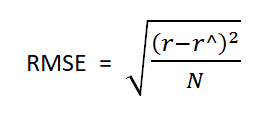

Where:
r is the actual rating,
r^ is the predicted ratings and
N is the total number of predictions

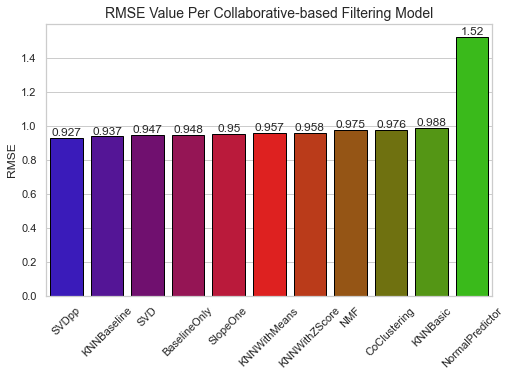

In [ ]:
# Compare RMSE values between models
fig,axis = plt.subplots(figsize=(8, 5))
rmse_x = ['SVDpp','KNNBaseline','SVD','BaselineOnly', 'SlopeOne', 'KNNWithMeans','KNNWithZScore','NMF',
          'CoClustering','KNNBasic','NormalPredictor']
rmse_y = [0.926883,0.936598,0.946591,0.947660,0.950195,0.956625,
          0.957817,0.975043,0.976045,0.987697,1.520192]
ax = sns.barplot(x=rmse_x, y=rmse_y,palette='brg',edgecolor='black')
plt.title('RMSE Value Per Collaborative-based Filtering Model',fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('RMSE')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_y() + p.get_height(), round(p.get_height(),3), fontsize=12, ha="center", va='bottom')
    
plt.show()

From here we can see that the best three performing models are KNNBaseline,SVDPP and SVN. SVDPP is performing the best with an RMSE of 0.926883 followed by KNNbaseline but they are both very computationaly expesive,we will go ahead and use the SVD algorithm on the whole dataset .

#### Predicting our data with SVD algorithm

To apply the algorithm to our own data we require a reader object, but only the rating_scale parameter must be specified. The dataframe must have three columns, corresponding to the user (raw) ids, the item (raw) ids, and the ratings in this order (which we will specify below). Each row thus corresponds to a given rating.

In [ ]:
# Run on the subset of the train data to illustrate the model performance 
from surprise.model_selection import train_test_split
train  = pd.read_csv('train.csv')

In [ ]:
#Loading 100000 dataset
data4 = Dataset.load_from_df(train[['userId', 'movieId', 'rating']].head(100000), Reader()) 

In [ ]:
trainset, testset = train_test_split(data4, test_size=0.05)

In [ ]:
from surprise import accuracy
#SVD model
svd=SVD(n_epochs = 30, n_factors = 200, init_std_dev = 0.05, random_state=42)

#Fitting the model
svd.fit(trainset)

# Making prediction on the validation dataset
test_pred= svd.test(testset)

#Evaluating model performance
rsme_collabo = accuracy.rmse(test_pred,
                             verbose=True)

RMSE: 0.9789


#### Hyperparameter tuning - SVD on the whole training dataset 

Hyperparameter tuning is the process of determining the right combination of hyperparameters that allows the model to maximize model performance. Setting the correct combination of hyperparameters is the only way to extract the maximum performance out of models.

Hyperparameter tuning on the whole dataset took a very long time to run,we will therefore do it for demonstration on a subset of the data.

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
reader = Reader(rating_scale=(0, 5))

In [ ]:
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']].head(100000), reader)

In [ ]:
from surprise.model_selection import GridSearchCV
from surprise import dataset

param_grid = {'n_epochs':[40,50], 
              'n_factors':[300,400], 
               'init_std_dev':[0.001, 0.005], 
              'random_state':[42]} 
grid_SVD = GridSearchCV(SVD, cv=5, measures=['rmse'], param_grid=param_grid, n_jobs=-1, joblib_verbose=10)
grid_SVD.fit(data)
print('Best Score is: ')
print(grid_SVD.best_score['rmse'])
print('Best Parameters are: ')
print(grid_SVD.best_params['rmse'])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 25.5min


Best Score is: 
0.9677265535715243
Best Parameters are: 
{'n_epochs': 40, 'n_factors': 400, 'init_std_dev': 0.005, 'random_state': 42}


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 27.3min finished


Tuning the parameters gave an RMSE of 0.9677 which is an improvement of the previous score of 0.9789.
These are however different results from what we got from hypertuning on the whole data set which gave us the best parameters as:

{'n_epochs': 50, 'n_factors': 400, 'init_std_dev': 0.001, 'random_state': 42}

<a id="seven"></a>
## 7. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


While performing the eda we noticed an outlier in the number of ratings per user ID we will go ahead and use while removing the outlier and see if this will improve the model performance.

In [ ]:
train_df = pd.read_csv('train.csv')
train_df.drop(train_df.index[train_df['userId'] == 72315], inplace=True)
train_df = train_df.reset_index(drop=True)

In [ ]:
# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(0, 5))

# The columns must correspond to user id, item id and ratings (in that order).
data3= Dataset.load_from_df(train_df[['userId', 'movieId', 'rating']].sample(100000), reader)# test set is made of 25% of the ratings.
trainset, testset = train_test_split(data3, test_size=.25)

# Use the SVD algorithm.
algo2 = SVD(n_epochs = 40, n_factors = 400, init_std_dev = 0.005, random_state=42)

# Train the algorithm on the trainset, and predict ratings for the testset
algo2.fit(trainset)
predictions = algo2.test(testset)

# Compute RMSE
accuracy.rmse(predictions)

RMSE: 0.9664


0.9664346025592163

Removing the outlier improves the performance of the model from 0.9677 on the sample trainset to 0.9664. We will therefore use this on the whole dataset for Kaggle submission.

In [ ]:
# Train model on whole dataset
reader = Reader(rating_scale=(train_df['rating'].min(), train_df['rating'].max()))
data = Dataset.load_from_df(train_df[['userId', 'movieId', 'rating']], reader)
trainset = data.build_full_trainset()
svd = SVD(n_epochs = 50, n_factors = 400, init_std_dev = 0.001, random_state=42, verbose=True)
svd.fit(trainset)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39
Processing epoch 40
Processing epoch 41
Processing epoch 42
Processing epoch 43
Processing epoch 44
Processing epoch 45
Processing epoch 46
Processing epoch 47
Processing epoch 48
Processing epoch 49


__overview of the performance of SVD__

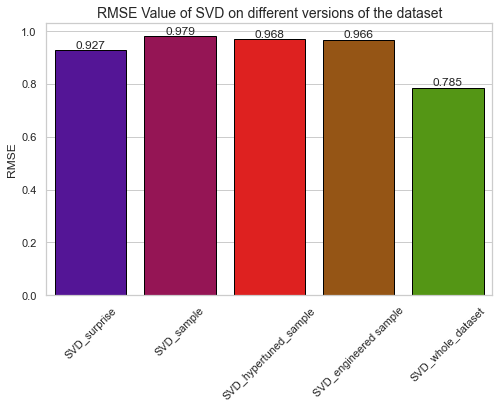

In [ ]:
# Compare RMSE of SVD of different versions of the dataset
fig,axis = plt.subplots(figsize=(8, 5))
rmse_x = ['SVD_surprise', 'SVD_sample', 'SVD_hypertuned_sample', 'SVD_engineered sample', 'SVD_whole_dataset']
rmse_y = [0.926883,0.9789,0.9677,0.9664,0.78525]
ax = sns.barplot(x=rmse_x, y=rmse_y,palette='brg',edgecolor='black')
plt.title('RMSE Value of SVD on different versions of the dataset',fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('RMSE')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_y() + p.get_height(), round(p.get_height(),3), fontsize=12, ha="center", va='bottom')
    
plt.show()

<a id="eight"></a>
## 8. Best Model Explanation
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

The singular value decomposition (SVD) algorithm is a baseline approach to recommender systems, as it has a broad range of applications including dimensionality reduction, solving linear inverse problems, and data fitting. The SVD algorithm generally performs better on large datasets compared to some other models as it decomposes a matrix into constituent arrays of feature vectors corresponding to each row and each column.

### 8.1 Kaggle Submission

In [ ]:
# Create Kaggle submission file
predictions = []
for i, row in test_df.iterrows():
    x = (svd.predict(row.userId, row.movieId))
    pred = x[3]
    predictions.append(pred)
test_df['Id'] = test_df['userId'].map(str) +'_'+ test_df['movieId'].map(str)
results = pd.DataFrame({"Id":test_df['Id'],"rating": predictions})
results.to_csv("submission2.csv", index=False)

In [ ]:
from google.colab import files
files.download('submission2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 8.2. Pickle file generation 

In [11]:
#we will use a subset of the data for model deployment
train_df = pd.read_csv('train.csv')
new_df = train_df.sample(15000)
df = pd.DataFrame(new_df)
del df['timestamp']


# setting up the reader
reader = Reader(rating_scale=(0, 5))

# selecting necessary columns for training
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

In [12]:
trainset = data.build_full_trainset()
svdpickle = SVD(n_epochs = 50, n_factors = 400, init_std_dev = 0.001, random_state=42)
svdpickle.fit(trainset)


In [13]:
pickle.dump(svdpickle, open("./SVD_model.pkl",'wb'))

Let us look at the performance of our pickle file

In [14]:
from surprise import accuracy
from surprise.model_selection import train_test_split

In [16]:
# create 25% test set
trainset, testset = train_test_split(data, test_size=0.1)

# Use the same algorithm.
algosvd = SVD(n_epochs = 50, n_factors = 400, init_std_dev = 0.001, random_state=42)

# Train the algorithm on the trainset, and predict ratings for the testset
algosvd.fit(trainset)
predictions = algosvd.test(testset)

# Compute RMSE
accuracy.rmse(predictions)

RMSE: 1.0314


1.031441439422416

The model trained on 15000 records gave an RMSE of 1.0314

### 8.3 Comet Experiment End

In [ ]:
experiment.log_dataset_hash(trainset)

params = {'n_epochs':30, 
          'n_factors':200, 
          'init_std_dev':0.05,
          'random_state':[42]} 
metrics = {"RMSE": rsme_collabo}

experiment.log_parameters(params)
experiment.log_metrics(metrics)
experiment.end()

COMET WARNING: Couldn't retrieve Google Colab notebook content
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/jeniffermukami/team-15-recommender-system/c8aa95eace43415fa4da06d3858a5335
COMET INFO:   Metrics:
COMET INFO:     RMSE : 0.9789429569592606
COMET INFO:   Others:
COMET INFO:     notebook_url : https://colab.research.google.com/notebook#fileId=1sMmWMbJsBAj3yYy1kP9QNrFSWqa5FLuL
COMET INFO:   Parameters:
COMET INFO:     init_std_dev : 0.05
COMET INFO:     n_epochs     : 30
COMET INFO:     n_factors    : 200
COMET INFO:     random_state : [42]
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     filename            : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 1
COMET INFO:     os packages         : 1
COMET INFO:     source_code

<a id="nine"></a>
## 9. Conclusion
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In order to construct a recommendation algorithm capable of accurately predicting how a user will rate a movie they have not yet viewed, based on their historical preferences we dealt with a large dataset which afforded us the opportuninty to gather insights that could be used to better understand our user's behaviour and which allowed us to dig deeper in understanding how different features can be used to maximise a consumer's experience.

While in the beginning of recommender systems it was important to find explicit similarity in people and products, a more effective method has been used to look at similarity of latent attributes. This is done by using matrix factorization algorithms eg the SVD algorithm. To oversimplify, all of the attributes for an item or a customer are combined in a way which reveals relationships that have not yet been realized.

Recommender systems can be a very powerful tool in a company’s arsenal, and future developments like the use of hybrid algorithms which combines collaborative and content-based filtering together may help in overcoming the shortcoming we are facing at using them separately and also can be more effective .This is going to increase business value even further. Some of the applications include being able to anticipate seasonal purchases based on recommendations, determine important purchases, and give better recommendations to customers which can increase retention and brand loyalty.

<a href=#cont>Back to Top</a>